# Graph Isomorphism

by David Amankwah

Student Number: G00394825

<h2>Introduction</h2>
Before comprehending the graph ismorpism problem, let's first define graph.
Graph Theory is a very popular subject in computer science. Graph theory concerns the relationsip of edges and vertices. A graph is made up of a collection of nodes or vertices that are linked together by a collection of edges. In the disciplines of mathematics, engineering, and computer science, the study of graphs is essential. Graph exist in many forms having similar number of vertices, edges and edge connectivity. These are called graph ismorphic graphs. Now let's talk about the graph isomorphism problem. 





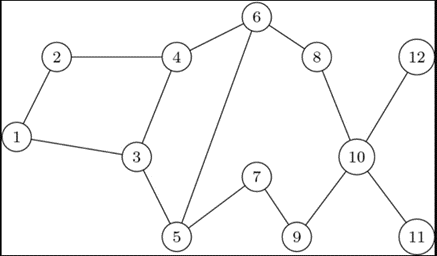

This graph's 12 vertices and 14 edges are shown in the diagram above.  

<h2>Graph Isomorphism Problem Definition</h2>
Graphs can be isomorphic when the number of vertices and edges are similar, or They maintain their edge connectivity.

Deciding whether two graphs are identical, or isomorphic, is a classical algorithmic problem that has been studied since the early days of computing. Applications can be found in many various fields, such as computer vision and chemistry.

The computational challenge of finding out if two finite graphs are isomorphic is known as the graph isomorphism problem. The problem appears to have no polynomial-time solution and to be NP-complete, putting it in the category of computational complexity known as NP-intermediate. The graph isomorphism problem is in the low hierarchy of class NP, which means it is not NP-complete unless the polynomial time hierarchy falls to its second level.

Isomorphism can be a mapping which includes inverse mapping. There is also a description of equivalence. A couple of vertices linked by edges are adjacent. In the context of graph, a bijection maintains an adjacent that is referred by isomorphism. A bijection maps from one to the other and from the other back to the one. A well organized graph isomorphism algorithm could make an impact on fields like pattern recognition, computer vision and matching. 


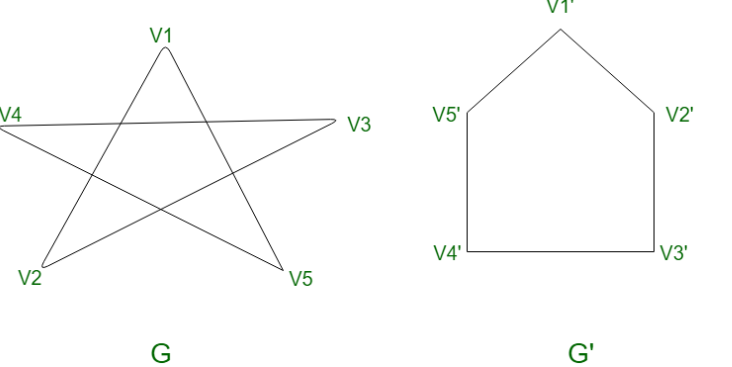

The image above is an example of two graphs that are isomorphic. The graphical order of the vertices and edges makes them look very different, but they are the same graph.

## Complexity classes
In the theory of computational complexity, Complexity classes get defined with granular sets of complexity classes called DTIME, NTIME, DSPACE and NSPACE using big O notion. These computational problems are used for time complexity and space complexity. Polynomial time and NP are two complexity classes for time and space complexity. The Graph Ismorphism problem is known to be a NP problem.

Since the graph isomorphism problem is neither in the class polynomial nor NP-complete, it is considered NP-intermediate. An NP-intermediate problem is in NP ("yes" answers are verified in polynomial time). It is not in polynomial, no polynomial-time algorithm can solve the problem. It is also not NP complete.

It is a clear difference between the class of problems that are efficiently solvable and the class of problems whose solutions are merely efficiently checkable, polynomial and NP are actually at the center of one of the most popular unsolved problems in computer science. polynomial is a subset of NP, but it is not known whether NP is strictly larger than polynomial. polynomial problems are usually fast for a computer to solve. NP problems are also quick and simple to allow computer to check, but they are difficult to solve.

In the event that P = NP, the nondeterminism give no additional computational power over determinism with regards to the ability to quickly find a solution to a problem. Furthermore, it would follow that if there exists a proof for a problem instance and that proof can be quickly be checked for correctness (that is, if the problem is in NP).

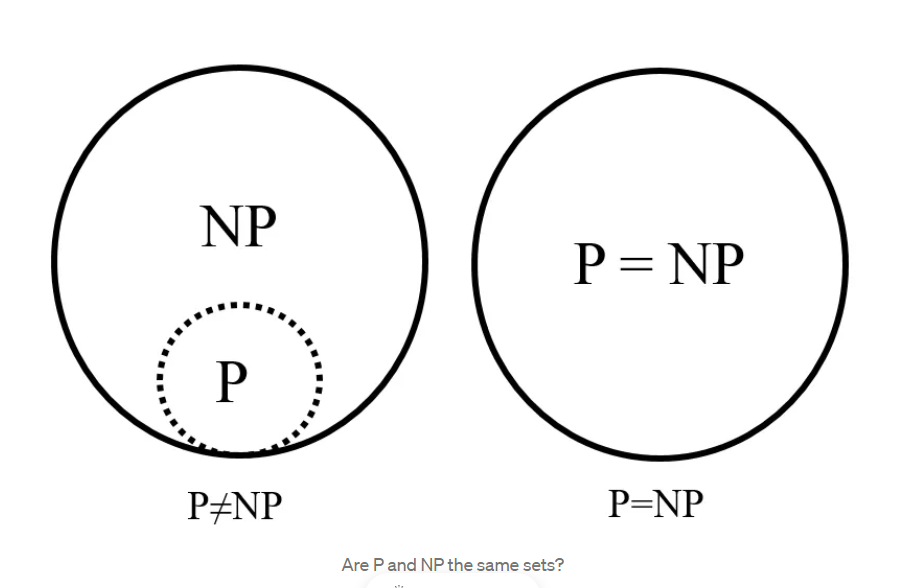

People wonder if everything in NP would turn out to be in P or if there were NP problems that were really harder than the ones in P.


## Implementation of the Graph Isomorphism
There are various algorithms to solve graph ismorphism problem. However, there are no efficient algorithms knwon. We know graph ismorphism problem ask whether two given graphs are isomorphic. The code below is a simple implementation of the graph isomorphism problem in Python using the NetworkX library

In [1]:
import networkx as nx

def is_isomorphic(graph1, graph2):
    # lets see if the two adjacency matrices graph1 and graph2 will be isomorphic graphs
    if len(graph1) != len(graph2):
        return false

    # check all node mappings
    for perm in nx.algorithms.isomorphism.faster_could_be_isomorphic(graph1, graph2):
        if nx.is_isomorphic(graph1, graph2, node_match=lambda node1, node2: node1['blue'] == node2['blue'], edge_match=lambda edge1, edge2: edge1['weight'] == edge2['weight']):
            return true

    return false


The graph ismorphism implementation above use a NetworkX library to create possible node mappings between two graphs, and the try each one for isomorphism using "is_isomorphic" function. The "node_match" and "edge_match" parameters get certain node and edge attribute matching methods. 

We must know this graph ismorphism implementation is not efficient for big graphs, as it tries every node mapping. It can still be good for small graphs.

The code below implementation of graph isomorphism with NumPy and itertools library:

In [5]:
import numpy as np
import itertools

def is_isomorphic(graph1, graph2):
    # lets see if the two adjacency matrices graph1 and graph2 will be isomorphic graphs
    n, m = graph1.shape
    if (n, m) != graph2.shape:
        return False
    
    # check all permutations of nodes
    for perm in itertools.permutations(range(n)):
        P = np.zeros((n, n))
        for i, j in enumerate(perm):
            P[i, j] = 1
        if np.array_equal(P @ graph1 @ P.T, graph2):
            return True
    
    return False


The implementation above has two adjacency matrices graph1 and graph2 and checks to see if they are isomorphic graphs. The shape attribute of NumPy arrays make sure the matrices have similar dimensions.

Matplotlib is mainly a Python visualization library. It is not often used for graph isomorphism. However, it is able to visualize graphs with isomorphisms with Matplotlib.

This code below uses Python to create two graphs with NetworkX, visualizes them with Matplotlib, and then make a decesion to see if they are isomorphic or not.

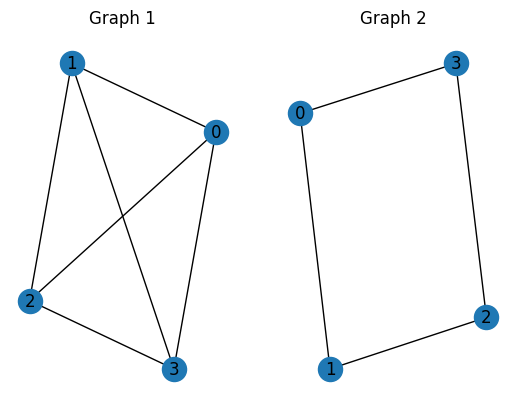

These Graphs aren't isomorphic


In [4]:
import networkx as nx
import matplotlib.pyplot as plt

def is_isomorphic(graph1, graph2):
    # lets see whether the number of nodes and edges are similar
    if graph1.number_of_nodes() != graph2.number_of_nodes() or graph1.number_of_edges() != graph2.number_of_edges():
        return False

    # lets see whether the degree sequence of each node is the similar
    degree_seq1 = sorted(list(dict(graph1.degree()).values()))
    degree_seq2 = sorted(list(dict(graph2.degree()).values()))
    if degree_seq1 != degree_seq2:
        return False

    # lets see whether the adjacency matrix of each graph is the similar
    adj_mat1 = nx.adjacency_matrix(graph1).todense()
    adj_mat2 = nx.adjacency_matrix(graph2).todense()
    for perm in permutations(range(adj_mat1.shape[0])):
        perm_mat = np.zeros_like(adj_mat1)
        for i, j in enumerate(perm):
            perm_mat[i, j] = 1

        if np.array_equal(perm_mat @ adj_mat1 @ perm_mat.T, adj_mat2):
            return True

    return False

# create two graphs
graph1 = nx.complete_graph(4)
graph2 = nx.Graph([(1, 0), (1, 2), (3, 2), (0, 3)])

# Visualize the two graphs
plt.subplot(121)
nx.draw(graph1, with_labels=True)
plt.title("Graph 1")
plt.subplot(122)
nx.draw(graph2, with_labels=True)
plt.title("Graph 2")
plt.show()

# lets see wether the graphs will be isomorphic or not
if is_isomorphic(graph1, graph2):
    print("These Graphs are isomorphic")
else:
    print("These Graphs aren't isomorphic")


The code above, defines a method called is_isomorphic that uses two graphs and returns true if they are isomorphic or false if they are not isomorphic. The method examines whether the number of nodes and edges are the similar in both graphs. It will examine the degree sequence of each node to see if they are similar. Lastly, it takes the adjacency matrices of the two graphs to inspect if they can be isomorphic, as they use the permutations of nodes.

 The next step is to create two graphs with NetworkX tools. The first graph is a complete graph on four nodes, and the second graph is a cycle on four nodes. We must visualize two graphs side by side with Matplotlib's subplot and show functions.

In the end, the is_isomorphic method checks whether the two graphs will be isomorphic, and output the result. In this case, the graphs will not isomorphic because the first graph is complete while the second graph is incomplete.

<h2>References</h2>
https://www.tutorialspoint.com/graph_theory/graph_theory_introduction.htm [1]

https://www.researchgate.net/figure/A-graph-G-on-12-vertices-and-14-edges_fig3_340856393 [2]

https://www.tutorialspoint.com/graph_theory/graph_theory_isomorphism.htm

https://en.wikipedia.org/wiki/Graph_isomorphism_problem

https://cacm.acm.org/magazines/2020/11/248220-the-graph-isomorphism-problem/abstract

https://www.geeksforgeeks.org/mathematics-graph-isomorphisms-connectivity/

https://en.wikipedia.org/wiki/Complexity_class

https://medium.com/@bilalaamir/p-vs-np-problem-in-a-nutshell-dbf08133bec5

https://stackoverflow.com/questions/40773886/what-are-np-intermediate-problems/40773945#40773945

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.isomorphism.is_isomorphic.html

https://www.w3schools.com/python/numpy/default.asp

http://users.cecs.anu.edu.au/~bdm/papers/pgi.pdf

https://docs.python.org/3/library/itertools.html

https://matplotlib.org/stable/tutorials/index.html

https://networkx.org/documentation/networkx-1.9.1/_downloads/networkx_tutorial.pdf

